# Fashion Mnist 

In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import random 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Explore the data

In [82]:
test=pd.read_csv('fashion-mnist_test.csv')
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [83]:
train=pd.read_csv('fashion-mnist_train.csv')
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Lets see how many missing values exists


In [84]:
print("Number of missing values in the test set:",test.isnull().any().sum())

Number of missing values in the test set: 0


In [85]:
print("Number of missing values in the train set:",train.isnull().any().sum())

Number of missing values in the train set: 0


The data is ready for work 

###### Lets show some information about the data
 

In [86]:
# Counter for each label
label_counter=train["label"].value_counts()

# Total number of labels
total_labels=len(train)

# Lets make dictionary for all the labels
labels={0:"T-shirt/top" , 1:"Trouser" , 2:"Pullover" , 3:"Dress" , 4:"Coat" , 
        5:"Sandal" , 6:"Shirt" , 7:"Sneaker" , 8:"Bag" , 9:"Ankle Boot"}

for i in range(len(label_counter)):
    label=labels[label_counter.index[i]]
    counter=label_counter.values[i]
    precent=(counter/total_labels)*100
    print("{:<15s}: has {} samples which is {}% of the data.".format(label, counter, precent))

T-shirt/top    : has 6000 samples which is 10.0% of the data.
Trouser        : has 6000 samples which is 10.0% of the data.
Pullover       : has 6000 samples which is 10.0% of the data.
Dress          : has 6000 samples which is 10.0% of the data.
Coat           : has 6000 samples which is 10.0% of the data.
Sandal         : has 6000 samples which is 10.0% of the data.
Shirt          : has 6000 samples which is 10.0% of the data.
Sneaker        : has 6000 samples which is 10.0% of the data.
Bag            : has 6000 samples which is 10.0% of the data.
Ankle Boot     : has 6000 samples which is 10.0% of the data.


In [87]:
test.shape

(10000, 785)

In [88]:
train.shape

(60000, 785)

In [89]:
train_arr = np.array(train,dtype='float32')
test_arr = np.array(test,dtype = 'float32')

Lets show some random image

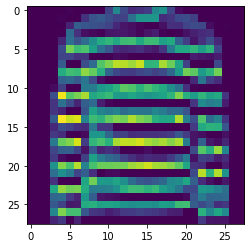

The image is: Pullover


In [90]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = random.randint(1,60000)
plt.figure()
plt.imshow(train_arr[i,1:].reshape(28,28))
plt.grid(False)
plt.show()
label = int(train_arr[i,0])
print(f'The image is: {class_names[label]}')

###### Lets show 3 samples from any label

In [91]:
images=[]

for k in labels.keys():
    # Get two samples for each category
    samples = train[train["label"] == k].head(3)
    # Append the samples to the samples list
    for j, s in enumerate(samples.values):
        # First column contain labels, hence index should start from 1
        img = np.array(samples.iloc[j, 1:]).reshape(28,28)
        images.append(img)
        
print("Total number of sample images to plot: ", len(images))

Total number of sample images to plot:  30


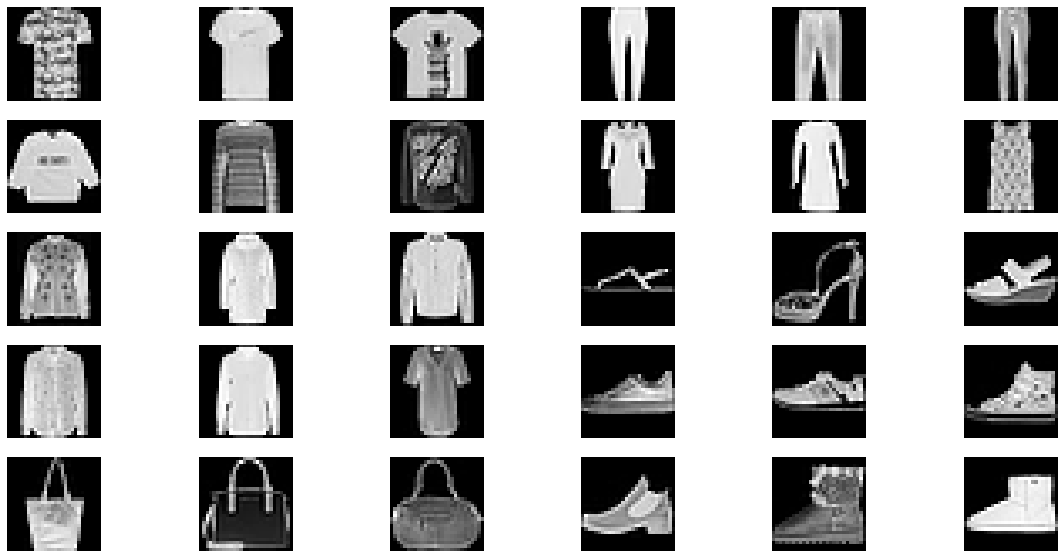

In [92]:
f, ax = plt.subplots(5,6, figsize=(20,10))

for i, img in enumerate(images):
    ax[i//6, i%6].imshow(img, cmap='gray')
    ax[i//6, i%6].axis('off')
plt.show()

## Preprocessing

After showing the data we will split the train set in order to test some models on it before
testing the real test set


In [93]:
train_labels = train["label"]
test_labels = test["label"]

# Drop the labels column from train dataframe as well as test dataframe
train = train.drop(["label"], axis =1)
test = test.drop(["label"], axis=1)

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, train_labels, test_size=0.2, random_state=0)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  48000
Number of samples in the validation set:  12000


Lets plot the new train set 

<AxesSubplot:xlabel='label', ylabel='count'>

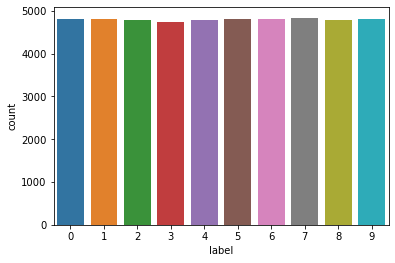

In [94]:
sns.countplot(y_train)

There are 784 columns and each image is 28*28 grayscale image, so we will need to reshape the data.

In [95]:
# Reshaping the data.
X_train = np.array(X_train.iloc[:, :]).reshape(len(X_train),28*28)
X_valid = np.array(X_valid.iloc[:, :]).reshape(len(X_valid), 28*28)
X_test = np.array(test.iloc[:,:]).reshape(len(test), 28*28)

In [96]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [98]:
# All the values are between 0-255 , so by dividing the values by 255 we will normalize the value to be between 0-1.
X_train /=255.
X_valid /=255.
X_test /=255.